# [决策树](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

## 0. 加载相关模块

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score

# 用于在jupyter中进行绘图
%matplotlib inline

## 1. 加载数据

In [2]:
iris = load_iris()

### 1.1  数据预览

In [3]:
print('特征名称：', iris.feature_names)

特征名称： ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
print('类别：', iris.target_names)

类别： ['setosa' 'versicolor' 'virginica']


### 1.2 数据处理

获取数据，将数据分为训练集和测试集，同时利用sklearn.preprocessing模块中的函数来对原始数据进行标准化，因为在一个范围内的数据会有效提高分类
的准确性，一些基本的标准化数据的方法有：
包括preprocessing.scale(X)<br>
preprocessing.StandardScaler().fit(X)<br>
preprocessing.MinMaxScaler().fit_transform(X_train)<br>
preprocessing.MaxAbsScaler().fit_transform(X)<br>



In [5]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)

print('数据集样本数：{}，训练集样本数：{}，测试集样本数：{}'.format(len(X), len(X_train), len(X_test)))

数据集样本数：150，训练集样本数：112，测试集样本数：38


## 2. 建立模型

In [6]:
dt_model = DecisionTreeClassifier(max_depth=3)

## 3. 训练模型

In [7]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## 4. 测试模型

In [8]:
y_pred = dt_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('准确率：', acc)

准确率： 0.9736842105263158


## 5. 查看超参数的影响
决策树模型的参数：<br>
max_depth_values:树的深度。其实不一定每个叶子节点都是只包含一类的节点，因为那会使模型变得复杂。所以可手动指定深度。<br>
criterion：表示在基于特征划分数据集合时，选择特征的标准。默认是’gini‘，即'Gini impurity'(Gini不纯度)，还可以是criterion='entropy'<br>
splitter：表示在构造树时，选择结点的原则，默认是splitter='best'，即选择最好的特征点分类，比如基于信息增益分类时，则选择信息增益最大的特征点，还可以是'random'<br>
max_features->这个参数表示在划分数据集时考虑的最多的特征值数量，根据数据类型表示的意义也不同：int值->在每次split时，最大特征数；float->表示百分数<br>
min_samples_split->int，float，optional(default=2)，表示在分解内部结点时最少的样本数<br>
min_samples_leaf->int，float，optional(default=1)，表示每个叶结点最小的样本数目<br>
...

In [9]:
max_depth_values = [2, 3, 4]

for max_depth_val in max_depth_values:
    dt_model = DecisionTreeClassifier(max_depth=max_depth_val)
    dt_model.fit(X_train, y_train)
    
    print('max_depth=', max_depth_val)
    print('训练集上的准确率: {:.3f}'.format(dt_model.score(X_train, y_train)))
    print('测试集的准确率: {:.3f}'.format(dt_model.score(X_test, y_test)))
    print()

max_depth= 2
训练集上的准确率: 0.964
测试集的准确率: 0.895

max_depth= 3
训练集上的准确率: 0.982
测试集的准确率: 0.974

max_depth= 4
训练集上的准确率: 1.000
测试集的准确率: 0.974



## 6. 决策树可视化

需要安装:
* **graphviz程序**(已提供在代码目录下)，并将安装目录下的bin目录添加到环境变量中，**重启jupyter或系统生效**。如：C:\Program Files (x86)\Graphviz2.38\bin 添加到系统PATH环境变量中。
  
* **graphviz模块**, pip install graphviz

In [10]:
from ml_visualization import plot_decision_tree

dt_model = DecisionTreeClassifier(max_depth=4)
dt_model.fit(X_train, y_train)
plot_decision_tree(dt_model, iris.feature_names, iris.target_names)

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [11]:
print(iris.feature_names)
print(dt_model.feature_importances_) #衡量特征重要性

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0.02014872 0.02014872 0.40530263 0.55439994]


当特征非常多时，如何选取？通过特征重要性进行选取，进行降维。

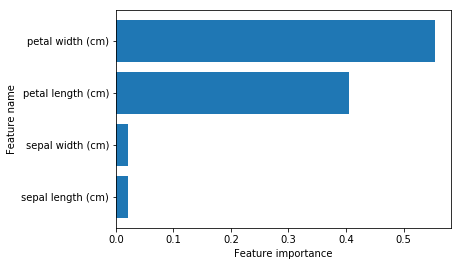

In [12]:
from ml_visualization import plot_feature_importances
plot_feature_importances(dt_model, iris.feature_names)

信息增益 Gain(D,A) = H(D)-H(D|A)